In [2]:
# Paquetes para trabajar con imágenes
import matplotlib.pyplot as plt
import numpy as np
from skimage import color
from skimage import io

# Aplicaciones de SVD
Clase teórica 03/11/2022

### Repaso: construcción de la descomposición

**Ejercicio:** calcular la descomposición SVD de 
$$ 
A = \begin{pmatrix}
3 & 2 & 2 \\
2 & 3 & -2
\end{pmatrix}
$$

In [26]:
A = np.array([[3, 2, 2], [2, 3, -2]])

# A^T * A = V * S^T * S * V^T
M = A.T @ A
print(M)

[[13 12  2]
 [12 13 -2]
 [ 2 -2  8]]


In [40]:
# Autovalores y autovectores de una matriz hermitiana
e = np.linalg.eigh(M)
print(e)

# Autovalores de mayor a menor
avals = np.flip(e[0])
print(np.round(avals,2))

(array([2.92821323e-15, 9.00000000e+00, 2.50000000e+01]), array([[-6.66666667e-01,  2.35702260e-01, -7.07106781e-01],
       [ 6.66666667e-01, -2.35702260e-01, -7.07106781e-01],
       [ 3.33333333e-01,  9.42809042e-01, -2.77555756e-17]]))
[25.  9.  0.]


In [41]:
V = np.flip(e[1], 1) # El parámetro 1 da vuelta las columnas de la matriz
print(avec)

[[-7.07106781e-01  2.35702260e-01 -6.66666667e-01]
 [-7.07106781e-01 -2.35702260e-01  6.66666667e-01]
 [-2.77555756e-17  9.42809042e-01  3.33333333e-01]]


In [43]:
# Verificamos
D = np.diag(avals)
V @ D @ V.T

array([[13., 12.,  2.],
       [12., 13., -2.],
       [ 2., -2.,  8.]])

In [49]:
sigma = np.sqrt(avals[0:2])
print(sigma)

[5. 3.]


In [50]:
print(A @ V)

[[-3.53553391e+00  2.12132034e+00  1.33226763e-15]
 [-3.53553391e+00 -2.12132034e+00  6.66133815e-16]]


In [51]:
U = np.zeros((2,2))
print(U)

[[0. 0.]
 [0. 0.]]


In [53]:
# u_i = 1/sigma_i * A * v_i
U[:,0] = 1/sigma[0] * A @ V[:,0]
U[:,1] = 1/sigma[1] * A @ V[:,1]
print(U)

[[-0.70710678  0.70710678]
 [-0.70710678 -0.70710678]]


In [54]:
# Verificamos
S = np.array([[5, 0, 0], [0, 3, 0]])
print(U @ S @ V.T)

[[ 3.  2.  2.]
 [ 2.  3. -2.]]


In [59]:
[Upy, Spy, Vhpy] = np.linalg.svd(A)
print(Upy)
print(Spy)
print(Vhpy.T)

[[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]]
[5. 3.]
[[-7.07106781e-01 -2.35702260e-01 -6.66666667e-01]
 [-7.07106781e-01  2.35702260e-01  6.66666667e-01]
 [-5.55111512e-17 -9.42809042e-01  3.33333333e-01]]


# A. Reducción de dimensionalidad

Vamos a usar la descomposición para detectar relaciones entre variables de datos, y también para eliminar variables redundantes.

## Ejemplo (datos simulados) 

In [3]:
A = np.array([[100, 100, 757, 200], [70, 80, 603, 150], [50, 90, 700, 140], [150, 40, 250, 190], [80, 10, 42, 90]])
print(A)

[[100 100 757 200]
 [ 70  80 603 150]
 [ 50  90 700 140]
 [150  40 250 190]
 [ 80  10  42  90]]


In [4]:
# Calculamos el rango
np.linalg.matrix_rank(A)

3

Utilizamos la descomposición en valores singulares para ver si hay más dependencias.

In [5]:
# Ojo, SVD de Python nos da la matriz V*, no la matriz V.
[U, S, Vh] = np.linalg.svd(A)

In [6]:
# Valores singulares
print(S)

[1.28383536e+03 2.03685842e+02 9.13996325e-01 4.16167276e-14]


Vemos que la matrix tiene rango 3, pero esta muy cerca de una matriz de rango 2.

### Descomposición SVD para detectar relaciones entre variables.

La descomposición SVD nos permite encontrar los coeficientes de las relaciones de dependencia lineal entre variables.

A partir de la fórmula $A = U \Sigma V^*$, obtenemos
$$
A V = U \Sigma.
$$

Como $U$ es unitaria, sus columnas tienen norma 1. Por lo tanto, la $i$-ésima columna de la matriz $U \Sigma$ tiene norma $\sigma_i$. Si $\sigma_i$ es chico, también lo será la norma de la $i$-ésima columna de $U \Sigma$.

A la vez, como $A V = U \Sigma$, las columnas de $U \Sigma$ son combinación lineal de las columnas de $A$ y 
los coeficientes de la combinación correspondiente a la $i$-ésima columna de $U \Sigma$ son los coeficientes de la $i$-ésima columna de $V$. 

En conclusión, cuando $\sigma_i$ es chico, si tomamos una combinación de las columnas de $A$ con coeficientes dados por la $i$-esima columna de $V$, obtenemos un vector de norma chica. Observemos que $V$ también es unitaria, y por lo tanto las columnas de $V$ son vectores de norma-2 igual a 1. Es decir, estamos tomando una combinación de columnas de $A$ con coeficientes "grandes" y nos da un vector de norma "chica".  Esto implica una relación de dependencia lineal (aproximada) de las columnas de $A$.



In [7]:
# Buscamos la relacion de dependencia lineal
# Miramos la ultima columna de V
V = np.transpose(Vh)
np.round(V[:,3],2)

array([-0.58, -0.58, -0.  ,  0.58])

Esto nos dice que la última columna es igual a la suma de las dos primeras.

In [8]:
# Si queremos buscar la relación correspondiente al tercer valor singular...
print(np.round(V[:,2],2))

# Verificamos
#q = V[:,2]
#print(A @ np.transpose(q))

[-0.44  0.81 -0.15  0.37]


Vemos una relación, pero como la cuarta columna es combinación de las primeras dos, es preferible primero eliminar la 4ta columna (o la primera o la segunda)

In [39]:
B = A[:, 0:3]
[UB, SB, VhB] = np.linalg.svd(B)
print(SB)

[1.24202415e+03 1.44213073e+02 7.70405413e-01]


In [40]:
np.round(VhB[2,:],2)
#np.round(VhB[2,:]/VhB[2,0],2)

array([-0.06,  0.99, -0.12])

In [41]:
B @ VhB[2,:]

array([-0.30026665,  0.66723306, -0.23463321, -0.04819725,  0.028085  ])

In [42]:
#### Ejemplo (datos de exportaciones argentinas)

In [11]:
# Leemos los datos de un archivo CSV
import pandas as pd   
datos = pd.read_csv("variablesExportacion_soloExpo.csv")   # dataFrame

In [12]:
display(datos)

,ano,EXPO_TOT_2004,EXPO_AGROP_2004,EXPO_PAMP_2004,EXPO_PECUAR_2004,EXPO_CARNES_2004,EXPO_LECHE_2004,EXPO_LANAS_2004,EXPO_CUEROS_PP_2004,EXPO_AGRIC_2004,...,EXPO_TEXTIL_2004,EXPO_CUEROIND_2004,EXPO_PAPEL_2004,EXPO_CAUCHO_2004,EXPO_QUIMICO_2004,EXPO_COMBIUST_2004,EXPO_HIERRO_2004,EXPO_METNOFERR_2004,EXPO_MAQUIN_2004,EXPO_RESTOIND_2004
0,1966.0,6333634.22,5675922.71,5563724.31,2220807.38,1145566.34,62187.36,239060.01,575541.23,3450986.58,...,1654.99,6829.96,67888.28,2077.04,97591.20,311724.52,44269.74,806.45,75912.46,36073.34
1,1967.0,5835217.42,5254582.56,5111380.39,2410845.43,1198095.93,69107.85,201213.99,660760.91,2839752.13,...,3279.87,6921.54,74308.04,4467.94,100669.08,167739.99,61943.90,1986.35,102067.27,38712.80
2,1968.0,4558947.98,3685459.82,3371157.68,2277316.06,1028137.99,47745.33,241060.03,725768.04,1403969.22,...,6520.45,12276.03,105886.36,10769.84,121251.59,256832.23,131592.17,5885.19,143196.80,53470.28
3,1969.0,5175646.33,4350920.16,4054621.02,2755310.97,1442774.46,58833.60,182534.32,789340.73,1592394.96,...,7009.26,17796.64,135684.74,24872.42,150879.31,88739.43,111081.11,6804.84,210312.47,44336.20
4,1970.0,4184635.10,3341704.72,2996037.07,1441522.79,1242994.34,30082.71,168445.74,803060.27,1888866.22,...,16289.54,42923.12,102325.10,21749.05,134120.08,96569.38,113306.75,8194.50,236319.25,38535.26
5,1971.0,4322811.98,3394203.42,3082926.56,1621378.16,828351.87,54747.81,162433.19,484022.56,1758401.13,...,7317.05,17137.52,99350.58,13193.28,128681.86,115212.21,137527.10,4870.73,277896.88,79201.49
6,1972.0,4298510.74,3289516.91,2954887.33,2033833.42,1221781.30,99317.83,166737.63,467528.82,1232810.26,...,9438.89,25828.74,114106.97,16712.47,148240.16,72426.68,143596.40,5783.06,373268.93,46760.92
7,1973.0,5016985.22,3408794.66,3033972.05,1585888.12,989475.01,87898.55,158413.80,292125.37,1767175.10,...,15627.53,91642.16,163861.27,26719.03,167672.33,54681.09,252798.66,15702.46,669384.50,72400.24
8,1974.0,4823621.97,2999981.00,2444161.04,935528.07,516346.61,53263.43,92075.27,231389.48,1984893.91,...,7564.56,113106.14,169299.36,25821.38,156176.49,50730.17,187779.36,16720.89,868564.78,90194.35
9,1975.0,3936228.16,2550241.00,2049386.26,892572.22,467205.41,80058.35,154969.91,170249.32,1583809.90,...,2545.22,42859.16,79654.27,5126.76,141018.64,63290.79,53656.60,6219.45,882279.19,38403.50


In [13]:
# Nombres de las variables
i = 0
for col in datos.columns:
    print(i, col)
    i = i + 1

0 ano
1 EXPO_TOT_2004
2 EXPO_AGROP_2004
3 EXPO_PAMP_2004
4 EXPO_PECUAR_2004
5 EXPO_CARNES_2004
6 EXPO_LECHE_2004
7 EXPO_LANAS_2004
8 EXPO_CUEROS_PP_2004
9 EXPO_AGRIC_2004
10 EXPO_CEREAL_2004
11 EXPO_OLEAGI_2004
12 EXPO_OTAGRIC_2004
13 EXPO_PESCA_2004
14 EXPO_INDUST_2004
15 EXPO_ALIMENT_2004
16 EXPO_TEXTIL_2004
17 EXPO_CUEROIND_2004
18 EXPO_PAPEL_2004
19 EXPO_CAUCHO_2004
20 EXPO_QUIMICO_2004
21 EXPO_COMBIUST_2004
22 EXPO_HIERRO_2004
23 EXPO_METNOFERR_2004
24 EXPO_MAQUIN_2004
25 EXPO_RESTOIND_2004


In [14]:
# Convertimos los datos a np.array
datosNP = datos.to_numpy()
print(datosNP)

[[1.96600000e+03 6.33363422e+06 5.67592271e+06 ... 8.06450000e+02
  7.59124600e+04 3.60733400e+04]
 [1.96700000e+03 5.83521742e+06 5.25458256e+06 ... 1.98635000e+03
  1.02067270e+05 3.87128000e+04]
 [1.96800000e+03 4.55894798e+06 3.68545982e+06 ... 5.88519000e+03
  1.43196800e+05 5.34702800e+04]
 ...
 [2.01400000e+03 4.06381560e+07 1.96350281e+07 ... 3.46168030e+05
  1.03361146e+07 2.70661265e+06]
 [2.01500000e+03 3.91943090e+07 2.14817333e+07 ... 3.14732720e+05
  7.32199953e+06 3.42242297e+06]
 [2.01600000e+03 3.97353074e+07 2.34561969e+07 ... 3.64431000e+05
  6.37869293e+06 2.68586917e+06]]


In [15]:
# Definimos la matriz A de variables explicativas (no utilizamos el año)
datosNP.shape

(51, 26)

In [16]:
A = datosNP[:, 1:]
A.shape

(51, 25)

In [17]:
print(A)

[[6.33363422e+06 5.67592271e+06 5.56372431e+06 ... 8.06450000e+02
  7.59124600e+04 3.60733400e+04]
 [5.83521742e+06 5.25458256e+06 5.11138039e+06 ... 1.98635000e+03
  1.02067270e+05 3.87128000e+04]
 [4.55894798e+06 3.68545982e+06 3.37115768e+06 ... 5.88519000e+03
  1.43196800e+05 5.34702800e+04]
 ...
 [4.06381560e+07 1.96350281e+07 1.49208846e+07 ... 3.46168030e+05
  1.03361146e+07 2.70661265e+06]
 [3.91943090e+07 2.14817333e+07 1.59155101e+07 ... 3.14732720e+05
  7.32199953e+06 3.42242297e+06]
 [3.97353074e+07 2.34561969e+07 1.84370551e+07 ... 3.64431000e+05
  6.37869293e+06 2.68586917e+06]]


In [22]:
# Para detectar variables redundantes, calculamos la descomposición SVD
[U, S, Vh] = np.linalg.svd(A)
print(S)

[2.56372898e+08 2.27039397e+07 1.56308913e+07 1.06028987e+07
 6.33804171e+06 4.10678298e+06 2.56267118e+06 2.19401325e+06
 1.56190746e+06 1.25880699e+06 9.25383150e+05 8.03546414e+05
 6.40757399e+05 5.56521208e+05 4.57351273e+05 3.76009204e+05
 3.42765875e+05 2.64296290e+05 2.00973514e+05 1.72463552e+05
 9.14433209e+04 6.26284404e+04 3.68784641e+04 1.86598591e-02
 1.30538975e-02]
0.7809963932586376


In [24]:
# Porcentaje explicado: 
print(S[0] / sum(S))

# Es decir, puedo descomponer a la matriz A como suma de matrices de rango 1, 
# y la matriz correspondiente al primer valor singular aporta el 78% de la norma.

0.7809963932586376


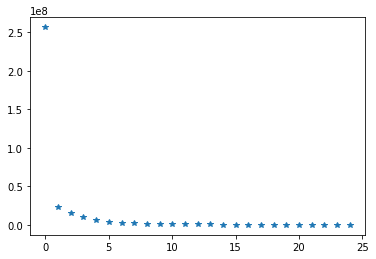

In [20]:
# Graficamos los valores singulares
import matplotlib.pyplot as plt
plt.plot(S, '*')

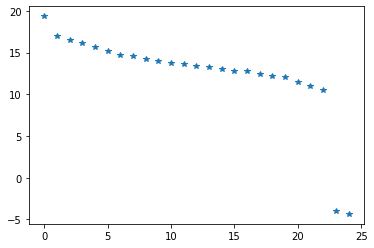

In [52]:
# Graficamos el logaritmo para distinguir mejor los saltos
plt.plot(np.log(S), '*')

In [53]:
# Verificamos
print(S)

[2.56372898e+08 2.27039397e+07 1.56308913e+07 1.06028987e+07
 6.33804171e+06 4.10678298e+06 2.56267118e+06 2.19401325e+06
 1.56190746e+06 1.25880699e+06 9.25383150e+05 8.03546414e+05
 6.40757399e+05 5.56521208e+05 4.57351273e+05 3.76009204e+05
 3.42765875e+05 2.64296290e+05 2.00973514e+05 1.72463552e+05
 9.14433209e+04 6.26284404e+04 3.68784641e+04 1.86598591e-02
 1.30538975e-02]


In [54]:
# Verificamos los coeficientes de las combinaciones lineales corresondientes a los menores valores singulares
print(np.round(Vh[24,:],2))
print(np.round(Vh[23,:],2))

[ 0.    0.22 -0.22  0.   -0.   -0.   -0.    0.    0.39 -0.39 -0.39 -0.62
 -0.22 -0.    0.    0.   -0.   -0.   -0.    0.   -0.   -0.   -0.   -0.
 -0.  ]
[-0.   -0.47  0.47 -0.    0.    0.    0.   -0.    0.33 -0.33 -0.33  0.13
  0.47  0.   -0.   -0.    0.   -0.   -0.    0.    0.   -0.    0.   -0.
 -0.  ]


In [55]:
A

array([[6.33363422e+06, 5.67592271e+06, 5.56372431e+06, ...,
        8.06450000e+02, 7.59124600e+04, 3.60733400e+04],
       [5.83521742e+06, 5.25458256e+06, 5.11138039e+06, ...,
        1.98635000e+03, 1.02067270e+05, 3.87128000e+04],
       [4.55894798e+06, 3.68545982e+06, 3.37115768e+06, ...,
        5.88519000e+03, 1.43196800e+05, 5.34702800e+04],
       ...,
       [4.06381560e+07, 1.96350281e+07, 1.49208846e+07, ...,
        3.46168030e+05, 1.03361146e+07, 2.70661265e+06],
       [3.91943090e+07, 2.14817333e+07, 1.59155101e+07, ...,
        3.14732720e+05, 7.32199953e+06, 3.42242297e+06],
       [3.97353074e+07, 2.34561969e+07, 1.84370551e+07, ...,
        3.64431000e+05, 6.37869293e+06, 2.68586917e+06]])

In [56]:
# Podemos escalar primero las variables y verificar si obtenemos los mismos resultados
A2 = A / sum(A)

In [57]:
[U2, S2, V2h] = np.linalg.svd(A2)
print(S2)

[8.32401175e-01 2.04748863e-01 1.47840773e-01 8.66449490e-02
 7.22931400e-02 5.93575278e-02 5.32888814e-02 4.51113629e-02
 3.57503531e-02 3.37517231e-02 2.43870248e-02 2.29814314e-02
 2.03343391e-02 1.72014442e-02 1.51257571e-02 1.37163153e-02
 1.30318118e-02 1.12798232e-02 1.02459680e-02 7.44583241e-03
 6.44798102e-03 5.96138589e-04 1.30647137e-04 5.71234789e-11
 4.48436789e-11]


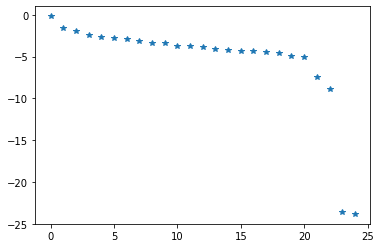

In [58]:
# Graficamos el logaritmo para distinguir mejor los saltos
plt.plot(np.log(S2), '*')

In [59]:
# Verificamos los coeficientes de las combinaciones lineales corresondientes a los menores valores singulares
print(np.round(V2h[24,:],2))
print(np.round(V2h[23,:],2))

[ 0.    0.75 -0.63  0.   -0.   -0.   -0.    0.    0.13 -0.04 -0.08 -0.09
 -0.05 -0.    0.    0.   -0.   -0.    0.    0.   -0.    0.   -0.   -0.
  0.  ]
[ 0.   -0.13  0.11 -0.    0.    0.   -0.    0.    0.82 -0.23 -0.48 -0.1
  0.01 -0.    0.    0.    0.   -0.   -0.    0.    0.   -0.    0.   -0.
 -0.  ]


## Ejercicio
1. ¿A qué variables corresponden las relaciones obtenidas? ¿Tienen sentido las relaciones obtenidas a partir de los nombres de las variables?
2. Eliminar alguna de las variables que aparecen en la primera relación y volver a calcular las relaciones. ¿Se puede ver más claramente la relación?

## B. Compresión de una imagen geométrica

1. Graficar la matriz A en blanco y negro, tomando 1 para blanco y 0 para negro.

In [7]:
A = np.array([
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], 
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], 
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], 
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], 
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], 
    [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1], 
    [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1], 
    [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1], 
    [1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1], 
    [1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1], 
    [1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1], 
    [1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1], 
    [1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1], 
    [1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1], 
    [1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1], 
    [1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1], 
    [1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1], 
    [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1], 
    [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1], 
    [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], 
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], 
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], 
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], 
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
])
print(np.shape(A))

(25, 15)


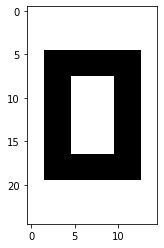

In [8]:
plt.imshow(A, cmap = "gray")

2. ¿Cuántas columnas distintas hay en el dibujo? ¿Cuántas filas distintas hay en $A$?

A partir de esa respuesta: 
- ¿Cuál es el máximo rango posible de $A$?
- ¿Cuántos valores singulares no nulos puede tener como máximo $A$?


3. ¿Cómo podríamos guardar en forma mas compacta esta matriz? (por ejemplo, sin guardar columnas repetidas)

### Valores singulares
Vamos a utilizar valores singulares para automatizar el proceso.

In [9]:
# Calculamos la descomposición en valores singulares
[U, S, Vh] = np.linalg.svd(A)
print("Tamaño de U = ", np.shape(U))
print("Tamaño de S = ", np.shape(S))
print("Tamaño de Vh = ", np.shape(Vh))

Tamaño de U =  (25, 25)
Tamaño de S =  (15,)
Tamaño de Vh =  (15, 15)


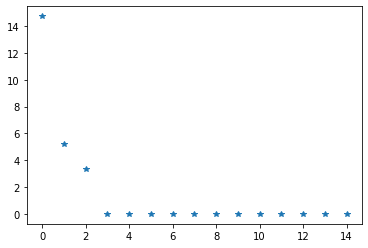

In [10]:
# Graficamos los valores singulares
plt.plot(S, '*')

In [11]:
# Observamos que hay 3 valores singulares no nulos. Lo verificamos.
print(S)

[1.47242531e+01 5.21662293e+00 3.31409370e+00 1.51448821e-16
 1.48952049e-16 1.02144979e-32 2.71957431e-33 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00]


4. Para evitar los errores numéricos, definimos una función que elimine de $\Sigma$ los valores singulares pequeños, dejando solo los primeros $k$ valores.

In [12]:
# Función para eliminar de S los valores singulares a partir del k+1
# Toma como parámetro también A para saber el tamaño de Sigma.
def truncateSigma(A, S, k):
    [nRow, nCol] = np.shape(A)
    Sigma = np.zeros((nRow, nCol))
    Sigma[:k, :k] = np.diag(S[:k])
    return(Sigma)

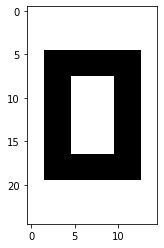

In [13]:
# Aplicamos la función para construir la matriz Sigma con 3 valores singulares no nulos
k = 3
S_trunc = truncateSigma(A, S, 3)
A_3 = U @ S_trunc @ Vh
plt.imshow(A_3, cmap='gray')

### Descomposición SVD reducida. 

Cuando $\Sigma$ tiene solo $k$ valores no nulos en la diagonal, podemos quedarnos con las primeras $k$ columnas de $U$ y las primeras $k$ columnas de $V$ (es decir, las primeras $k$ filas de $V$).

Obtenemos una descomposición que utiliza menos datos
$$
A = \tilde U \tilde \Sigma \tilde V^{*}
$$
con $\tilde U \in \mathbb{K}^{m \times k}$, $\tilde \Sigma \in \mathbb{K}^{k \times k}$, $\tilde V^{*} \in \mathbb{K}^{k \times n}$.

#### Ejercicio.
Demostrarlo, recordando la propiedad para $A$ de $m \times p$ y $B$ de $p \times n$,
$$A B = \sum_{i = 1}^p A_i B_i,$$
donde $A_i$ son las columnas de $A$ y $B_i$ son las filas de $B$.


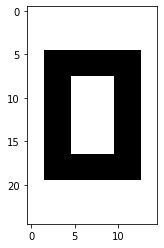

In [14]:
# Podemos construir A utilizando solo las primeras 3 columnas de U y 3 columnas de V (3 filas de Vh)
# y tomando solo la submatriz de 3x3 de S

k = 3
A_zip = U[:,:k] @ S_trunc[:k,:k] @ Vh[:k,]
plt.imshow(A_zip, cmap='gray')

Observación: este método funciona para cualquier matriz de rango 3, no solo para matrices con columnas repetidas.

*Ejercicio:*
¿Cuántos datos se requerían para guardar la matriz original? ¿Cuántos datos se requieren para guardar la descomposición SVD reducida?

## Compresión de la imagen de un árbol

Aplicando la misma estrategia, pero convirtiendo también a 0 los autovalores pequeños obtenemos una forma de comprimir imágenes, perdiendo un poco de calidad en este caso.

(1082, 2000, 3)


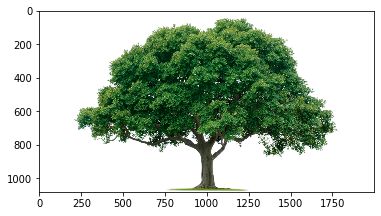

In [15]:
# Leemos el archivo
img = io.imread('tree2.jpg')
print(img.shape)

plt.imshow(img)

(1082, 2000)


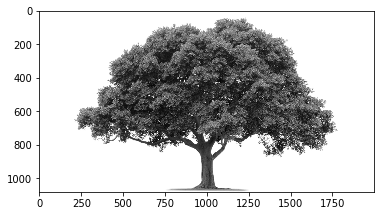

In [16]:
# Lo convertimos a tonos de gris para simplificar la aplicación
imgGray = color.rgb2gray(img)
print(imgGray.shape)

plt.imshow(imgGray, cmap='gray')

# Grabamos la imagen
#plt.savefig('test2.png')

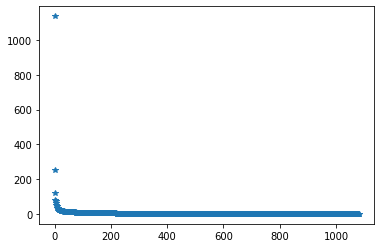

In [17]:
# Calculamos la descomposición SVD de A y graficamos los valores singulares
A = imgGray
[U, S, Vh] = np.linalg.svd(A)
plt.plot(S, '*')

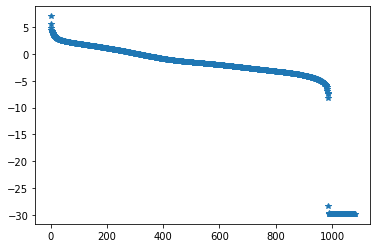

In [18]:
# Graficamos los logaritmos para ver mejor los saltos
plt.plot(np.log(S), '*')
plt.savefig('logS')

In [19]:
# Imprimimos los valores singulares a partir del 900
for i in range(900,1082):
    print(i, np.log(S[i]), S[i])


900 -4.020708469044395 0.017940250324075643
901 -4.039868295362877 0.017599790236972737
902 -4.046576132440238 0.017482128779592463
903 -4.057869756019104 0.017285802899800598
904 -4.062950905717315 0.017198193913291866
905 -4.073513301727118 0.017017495761197383
906 -4.083409780864237 0.016849913076458282
907 -4.0869112975325805 0.016791015999685147
908 -4.092347300641518 0.016699987623933675
909 -4.122400469831041 0.0162055667402058
910 -4.127450197800019 0.016123939308204382
911 -4.143163200367027 0.01587256391158548
912 -4.157418076329315 0.01564790751058426
913 -4.158617449387903 0.015629151082118688
914 -4.1860633709485136 0.015206027693608732
915 -4.204448974865939 0.014929010062817391
916 -4.215633210843123 0.014762970733666824
917 -4.219384516448559 0.014707694063464569
918 -4.233283771214225 0.014504682201753336
919 -4.263145534019271 0.014077950020048288
920 -4.268600288810822 0.014001367314550053
921 -4.274247564836852 0.013922520572786645
922 -4.2903949391782215 0.01369951

Vemos que podemos eliminar todos los valores singular a partir de i = 987 sin perder mucha información.


In [20]:
def truncateSigma(A, S, k):
    [nRow, nCol] = np.shape(A)
    Sigma = np.zeros((nRow, nCol))
    Sigma[:k, :k] = np.diag(S[:k])
    return(Sigma)

S_trunc = truncateSigma(A, S, 987)    
    

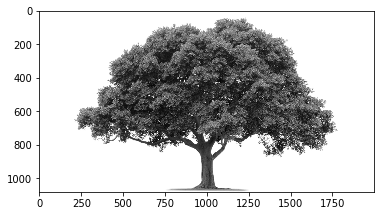

In [21]:
# Reconstruimos la imagen utilizando la nueva S
A_trunc = U @ S_trunc @ Vh
plt.imshow(A_trunc, cmap='gray')

2.0419413394340537e-11

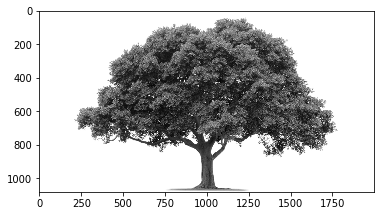

In [22]:
# Comparamos con la version original
plt.imshow(imgGray, cmap='gray')
np.linalg.norm(A_trunc-A)

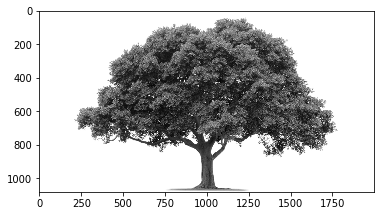

In [23]:
# ¿Cómo guardamos los datos para no guardar información de más?

# Podemos construir A utilizando solo las primeras k columnas de U y k columnas de V (k filas de Vh)
# y tomando solo la submatriz de 987x987 de Sigma

k = 987
A_zip = U[:,:k] @ S_trunc[:k,:k] @ Vh[:k,]
plt.imshow(A_zip, cmap='gray')

In [24]:
# A_zip y A_trunc son exactamente la misma matriz
np.linalg.norm(A_zip-A_trunc)

0.0

#### Ejercicio
¿Cuántos datos se requerían para guardar la matriz original? ¿Cuántos datos se requieren para guardar la descomposición SVD reducida? 

¿Hemos realizado una buena compresión de la imagen?

Distancia entre matrices:  21.14697673701067


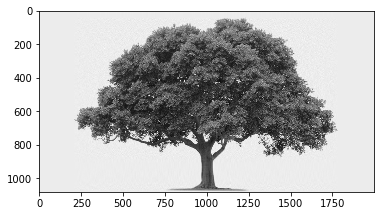

In [25]:
# Probamos eliminar más valores singulares
k = 200
A_zip = U[:,:k] @ S_trunc[:k,:k] @ Vh[:k,]
plt.imshow(A_zip, cmap='gray')
print("Distancia entre matrices: ", np.linalg.norm(A_zip-A))

In [26]:
# El color blanco se volvió gris...
A_zip[0:5,0:5]

array([[0.99995366, 0.99995366, 0.99995366, 0.99995366, 0.99995366],
       [0.99995366, 0.99995366, 0.99995366, 0.99995366, 0.99995366],
       [0.99995366, 0.99995366, 0.99995366, 0.99995366, 0.99995366],
       [0.99995366, 0.99995366, 0.99995366, 0.99995366, 0.99995366],
       [0.99995366, 0.99995366, 0.99995366, 0.99995366, 0.99995366]])

In [27]:
# Comprobamos si nos mantenemos en el rango [0, 1]
print("min = ", np.min(A_zip))
print("max = ", np.max(A_zip))

min =  -0.05719658404313147
max =  1.0856857172437255


La función imshow con `cmap = gray` toma el mínimo de los valores como negro y el máximo como blanco. Pero nosotros queremos que siga utilizando la misma escala de colores que antes. Forzamos a que todos los valores estén entre 0 y 1. Es decir tomamos todos los negativos como negro, y los mayores que 1 como blanco.

In [28]:
# Convertimos los valores mayores que 1 a 1 y los menores que 0 a 0.
A_zip = np.minimum(np.ones(A.shape), A_zip)
A_zip = np.maximum(np.zeros(A.shape), A_zip)

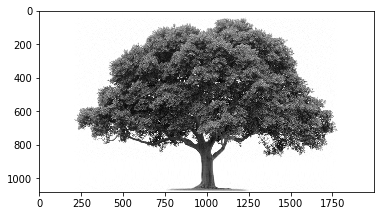

In [29]:
# Graficamos
plt.imshow(A_zip, cmap='gray')

In [30]:
# Calculamos la cantidad de datos en este caso. 
k = 200
[nr, nc] = A.shape
cant = k * nr + k * nc + k   # Datos en U, V y S respectivamente
print("Cantidad de datos originales: ", nr * nc)
print("Cantidad de datos en la imagen comprimida: ", cant)
print("Porcentaje de compresión: ", cant / (nr*nc) * 100)

Cantidad de datos originales:  2164000
Cantidad de datos en la imagen comprimida:  616600
Porcentaje de compresión:  28.493530499075785


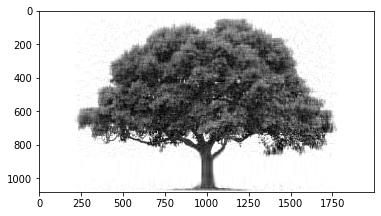

In [31]:
# Probamos eliminar más valores singulares
k = 40
A_zip = U[:,:k] @ S_trunc[:k,:k] @ Vh[:k,]
A_zip = np.minimum(np.ones(A.shape), A_zip)
A_zip = np.maximum(np.zeros(A.shape), A_zip)
plt.imshow(A_zip, cmap='gray')

In [32]:
# Calculamos la cantidad de datos en este caso. 
k = 40
[nr, nc] = A.shape
cant = k * nr + k * nc + k   # Datos en U, V y S respectivamente
print("Cantidad de datos originales: ", nr * nc)
print("Cantidad de datos en la imagen comprimida: ", cant)
print("Porcentaje de compresión: ", cant / (nr*nc) * 100)

Cantidad de datos originales:  2164000
Cantidad de datos en la imagen comprimida:  123320
Porcentaje de compresión:  5.6987060998151575


#### Ejercicio

Repetir estos pasos para el ejemplo `quijote.jpg` de la práctica, y resolver los ejercicios 9 a 13.